In [48]:
import pandas as pd
import numpy as np

In [49]:
COLUMNS = ['Age', 'Loan Amount Request (USD)', 'Credit Score',
           'Property Age', 'Co-Applicant', 'Loan Sanction Amount (USD)', 'Gender', 'Profession', 'Location']

data = pd.read_csv(r"4\train.csv", usecols=COLUMNS)
data.dtypes

Gender                         object
Age                             int64
Profession                     object
Location                       object
Loan Amount Request (USD)     float64
Credit Score                  float64
Property Age                  float64
Co-Applicant                    int64
Loan Sanction Amount (USD)    float64
dtype: object

In [50]:
data.head()

,Gender,Age,Profession,Location,Loan Amount Request (USD),Credit Score,Property Age,Co-Applicant,Loan Sanction Amount (USD)
0,F,56,Working,Semi-Urban,72809.58,809.44,1933.05,1,54607.18
1,M,32,Working,Semi-Urban,46837.47,780.40,4952.91,1,37469.98
2,F,65,Pensioner,Semi-Urban,45593.04,833.15,988.19,0,36474.43
3,F,65,Pensioner,Rural,80057.92,832.70,NaN,1,56040.54
4,F,31,Working,Semi-Urban,113858.89,745.55,2614.77,1,74008.28


In [51]:
data.describe()

,Age,Loan Amount Request (USD),Credit Score,Property Age,Co-Applicant,Loan Sanction Amount (USD)
count,30000.000000,30000.000000,28297.000000,2.515000e+04,30000.000000,29660.000000
mean,40.092300,88826.333855,739.885381,2.631119e+03,-4.743867,47649.342208
std,16.045129,59536.949605,72.163846,1.132268e+04,74.614593,48221.146686
min,18.000000,6048.240000,580.000000,3.777000e+02,-999.000000,-999.000000
25%,25.000000,41177.755000,681.880000,1.650450e+03,1.000000,0.000000
50%,40.000000,75128.075000,739.820000,2.223250e+03,1.000000,35209.395000
75%,55.000000,119964.605000,799.120000,3.091408e+03,1.000000,74261.250000
max,65.000000,621497.820000,896.260000,1.777460e+06,1.000000,481907.320000


In [52]:
indexes = data[data['Loan Sanction Amount (USD)'].isna()].index
data.drop(index=indexes, axis=0, inplace=True)

indexes = data[data['Loan Sanction Amount (USD)'] < 0].index
data.loc[indexes,'Loan Sanction Amount (USD)'] = 0

In [53]:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
categorical = data.select_dtypes(include = ["object"]).keys()

In [54]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')
data[quantitative] = si.fit_transform(data[quantitative])

In [55]:
y = data["Loan Sanction Amount (USD)"]

In [56]:
y.value_counts()

Loan Sanction Amount (USD)
0.00         8203
28937.45        3
26047.92        2
105047.72       2
15270.22        2
             ... 
164339.54       1
24156.78        1
60149.10        1
14002.40        1
37469.98        1
Name: count, Length: 21449, dtype: int64

(array([1.7303e+04, 7.7950e+03, 3.2110e+03, 9.8900e+02, 3.0000e+02,
        5.2000e+01, 8.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([     0.   ,  48190.732,  96381.464, 144572.196, 192762.928,
        240953.66 , 289144.392, 337335.124, 385525.856, 433716.588,
        481907.32 ]),
 <BarContainer object of 10 artists>)

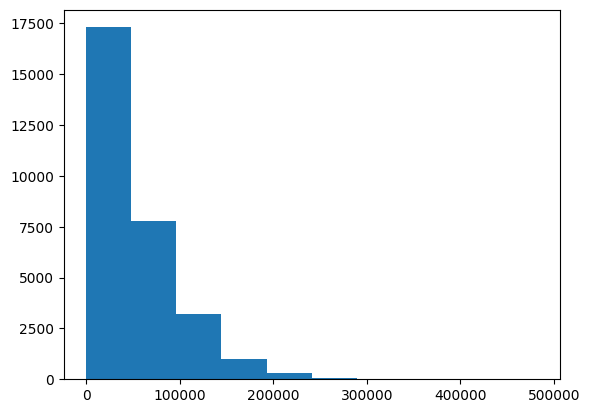

In [57]:
import matplotlib.pyplot as plt
plt.hist(y)

In [58]:
X_nocat = data[quantitative].drop("Loan Sanction Amount (USD)", axis=1)
X_cat = data[categorical]

In [59]:
X_cat

,Gender,Profession,Location
0,F,Working,Semi-Urban
1,M,Working,Semi-Urban
2,F,Pensioner,Semi-Urban
3,F,Pensioner,Rural
4,F,Working,Semi-Urban
...,...,...,...
29995,M,Commercial associate,Urban
29996,M,Working,Semi-Urban
29997,F,Working,Urban
29998,M,Working,Semi-Urban


In [60]:
X_nocat

,Age,Loan Amount Request (USD),Credit Score,Property Age,Co-Applicant
0,56.0,72809.58,809.440000,1933.050000,1.0
1,32.0,46837.47,780.400000,4952.910000,1.0
2,65.0,45593.04,833.150000,988.190000,0.0
3,65.0,80057.92,832.700000,2631.317285,1.0
4,31.0,113858.89,745.550000,2614.770000,1.0
...,...,...,...,...,...
29995,38.0,76657.90,869.610000,4969.410000,1.0
29996,20.0,66595.14,729.410000,1606.880000,1.0
29997,49.0,81410.08,739.853475,2631.317285,1.0
29998,38.0,142524.10,677.270000,2417.710000,1.0


In [61]:
X_nocat.shape

(29660, 5)

In [62]:
y.shape

(29660,)

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_nocat)

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=11)

print(len(X_train))
print(len(X_test))

23728
5932


In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [68]:
from sklearn.metrics import root_mean_squared_error, r2_score

y_pred = lr.predict(X_test)
print(root_mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

31269.30628313977
0.5831539510557129


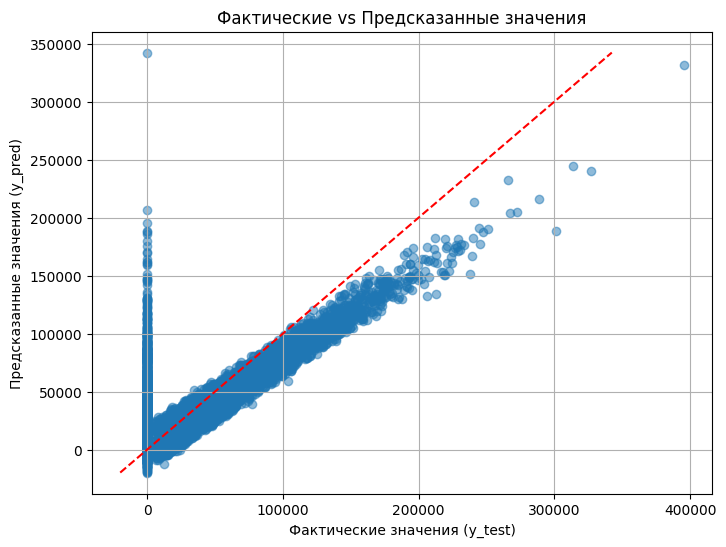

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'r--')
plt.xlabel("Фактические значения (y_test)")
plt.ylabel("Предсказанные значения (y_pred)")
plt.title("Фактические vs Предсказанные значения")
plt.grid(True)
plt.show()

In [21]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

def cv(X, y, model, n_splits):
    kf = KFold(n_splits)

    rmse_arr = []
    r2_arr = []

    for train, test in tqdm(kf.split(X, y), total=n_splits):
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        clf = model.fit(X_train, y_train)
        rmse = np.array([-root_mean_squared_error(y_test, p) for p in clf.staged_predict(X_test)])
        r2 = np.array([r2_score(y_test, p) for p in clf.staged_predict(X_test)])
        rmse_arr.append(rmse)
        r2_arr.append(r2)

    return np.array(rmse_arr), np.array(r2_arr)

d:\code\mlhw\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

gb_1 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=11)
gb_2 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=11)
gb_3 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=8, random_state=11)

gb_4 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=11)
gb_5 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=8, random_state=11)

cv_gb1_rmse, cv_gb1_r2 = cv(X_nocat, y, gb_1, 5)
cv_gb2_rmse, cv_gb2_r2 = cv(X_nocat, y, gb_2, 5)
cv_gb3_rmse, cv_gb3_r2 = cv(X_nocat, y, gb_3, 5)
cv_gb4_rmse, cv_gb4_r2 = cv(X_nocat, y, gb_4, 5)
cv_gb5_rmse, cv_gb5_r2 = cv(X_nocat, y, gb_5, 5)

100%|██████████| 5/5 [15:35<00:00, 187.11s/it]


max - -23492.892161695065 argmax - 220
max - -23118.186190013523 argmax - 65
max - -23402.502897682018 argmax - 35
max - -23092.769962230428 argmax - 688
max - -23318.40005490931 argmax - 384


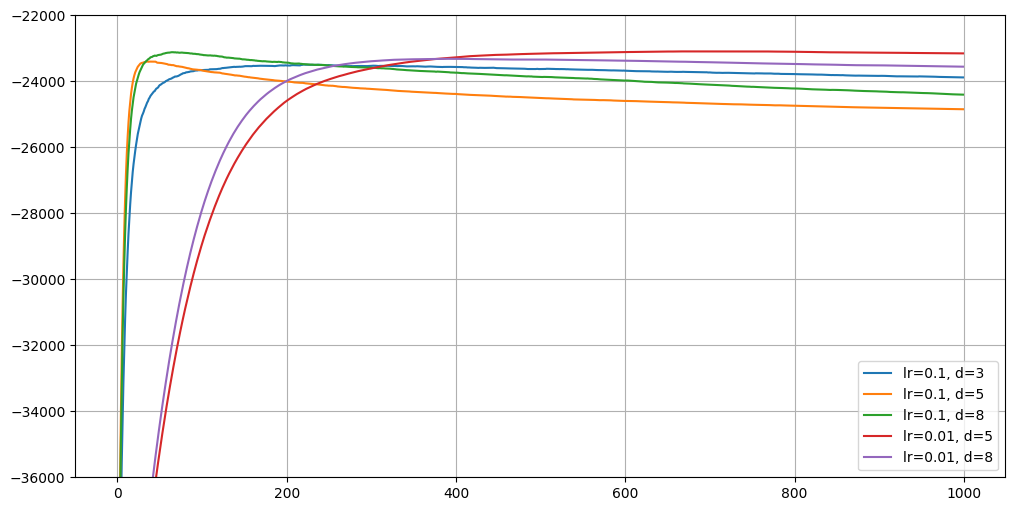

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(cv_gb1_rmse.mean(axis=0), label='lr=0.1, d=3')
plt.plot(cv_gb3_rmse.mean(axis=0), label='lr=0.1, d=5')
plt.plot(cv_gb2_rmse.mean(axis=0), label='lr=0.1, d=8')
plt.plot(cv_gb4_rmse.mean(axis=0), label='lr=0.01, d=5')
plt.plot(cv_gb5_rmse.mean(axis=0), label='lr=0.01, d=8')
plt.ylim((-36000, -22000))
plt.grid()
plt.legend()

print(f"max - {np.max(cv_gb1_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb1_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb2_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb2_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb3_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb3_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb4_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb4_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb5_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb5_rmse.mean(axis=0))}")

max - 0.7620266128220625 argmax - 220
max - 0.7694872988801105 argmax - 65
max - 0.7636947271866796 argmax - 35
max - 0.7699989473497358 argmax - 748


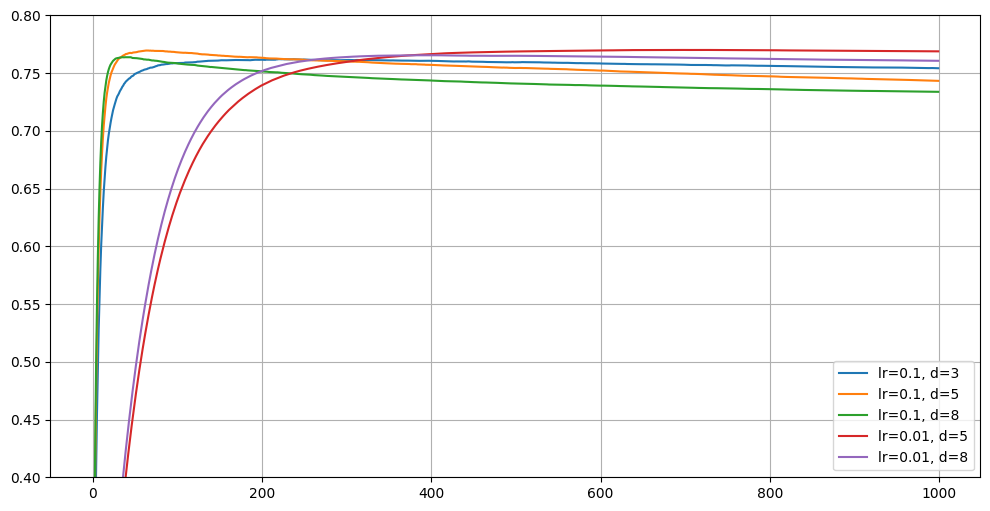

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(cv_gb1_r2.mean(axis=0), label='lr=0.1, d=3')
plt.plot(cv_gb2_r2.mean(axis=0), label='lr=0.1, d=5')
plt.plot(cv_gb3_r2.mean(axis=0), label='lr=0.1, d=8')
plt.plot(cv_gb4_r2.mean(axis=0), label='lr=0.01, d=5')
plt.plot(cv_gb5_r2.mean(axis=0), label='lr=0.01, d=8')
plt.ylim((0.4, 0.8))
plt.grid()
plt.legend()

print(f"max - {np.max(cv_gb1_r2.mean(axis=0))} argmax - {np.argmax(cv_gb1_r2.mean(axis=0))}")
print(f"max - {np.max(cv_gb2_r2.mean(axis=0))} argmax - {np.argmax(cv_gb2_r2.mean(axis=0))}")
print(f"max - {np.max(cv_gb3_r2.mean(axis=0))} argmax - {np.argmax(cv_gb3_r2.mean(axis=0))}")
print(f"max - {np.max(cv_gb4_r2.mean(axis=0))} argmax - {np.argmax(cv_gb4_r2.mean(axis=0))}")

In [ ]:
gb_3.fit(X_train, y_train)
y_pred = gb_3.predict(X_test)

In [26]:
print(root_mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

24697.493967636816
0.7399571167851905


In [27]:
X = pd.concat([X_nocat, X_cat], axis=1)

In [28]:
X

,Age,Loan Amount Request (USD),Credit Score,Property Age,Co-Applicant,Gender,Profession,Location
0,56.0,72809.58,809.440000,1933.050000,1.0,F,Working,Semi-Urban
1,32.0,46837.47,780.400000,4952.910000,1.0,M,Working,Semi-Urban
2,65.0,45593.04,833.150000,988.190000,0.0,F,Pensioner,Semi-Urban
3,65.0,80057.92,832.700000,2631.317285,1.0,F,Pensioner,Rural
4,31.0,113858.89,745.550000,2614.770000,1.0,F,Working,Semi-Urban
...,...,...,...,...,...,...,...,...
29995,38.0,76657.90,869.610000,4969.410000,1.0,M,Commercial associate,Urban
29996,20.0,66595.14,729.410000,1606.880000,1.0,M,Working,Semi-Urban
29997,49.0,81410.08,739.853475,2631.317285,1.0,F,Working,Urban
29998,38.0,142524.10,677.270000,2417.710000,1.0,M,Working,Semi-Urban


In [29]:
X_oh = pd.get_dummies(X)

In [30]:
from sklearn.preprocessing import TargetEncoder

enc = TargetEncoder()

cat_cols = ['Gender', 'Profession', 'Location']

X[cat_cols] = enc.fit_transform(X[cat_cols], y)

One hot

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_oh, y, test_size=0.2, random_state=11)
lrx = LinearRegression()
lrx.fit(X_train, y_train)
y_pred = lrx.predict(X_test)
print(root_mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

31279.66080090135
0.5828778365542682


In [32]:
y

0         54607.18
1         37469.98
2         36474.43
3         56040.54
4         74008.28
           ...    
29995     68992.11
29996     46616.60
29997     61057.56
29998     99766.87
29999    117217.90
Name: Loan Sanction Amount (USD), Length: 29660, dtype: float64

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gb_1 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=11)
gb_2 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=11)

gb_3 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=8, random_state=11)
gb_4 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=11)

gb_5 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=8, random_state=11)

cv_gb1_rmse, cv_gb1_r2 = cv(X_oh, y, gb_1, 5)
cv_gb2_rmse, cv_gb2_r2 = cv(X_oh, y, gb_2, 5)
cv_gb3_rmse, cv_gb3_r2 = cv(X_oh, y, gb_3, 5)
cv_gb4_rmse, cv_gb4_r2 = cv(X_oh, y, gb_4, 5)
cv_gb5_rmse, cv_gb5_r2 = cv(X_oh, y, gb_5, 5)

100%|██████████| 5/5 [41:54<00:00, 502.86s/it]


max - -23147.356979326094 argmax - 286
max - -22744.392184041215 argmax - 73
max - -22967.93812085402 argmax - 39
max - -22694.408802016977 argmax - 647
max - -22914.641171937536 argmax - 427


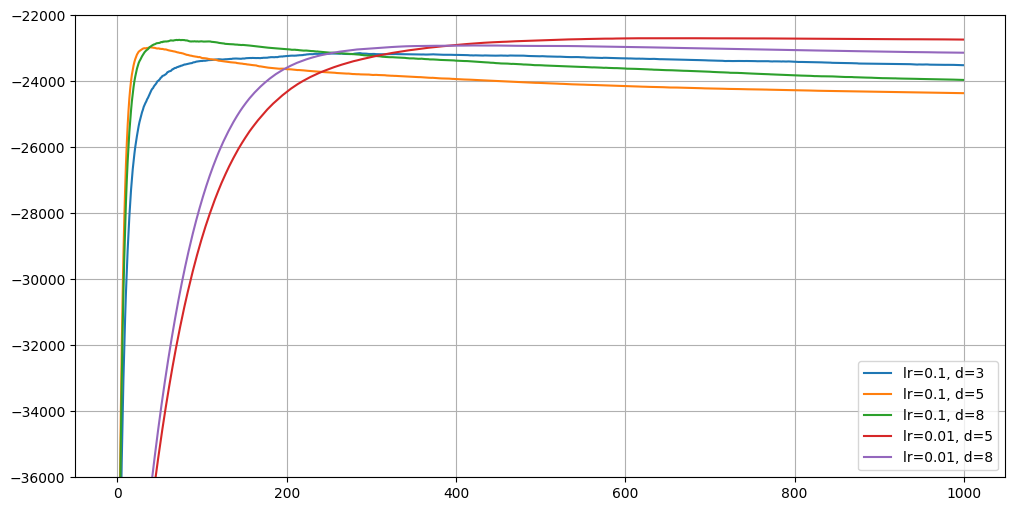

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(cv_gb1_rmse.mean(axis=0), label='lr=0.1, d=3')
plt.plot(cv_gb3_rmse.mean(axis=0), label='lr=0.1, d=5')
plt.plot(cv_gb2_rmse.mean(axis=0), label='lr=0.1, d=8')
plt.plot(cv_gb4_rmse.mean(axis=0), label='lr=0.01, d=5')
plt.plot(cv_gb5_rmse.mean(axis=0), label='lr=0.01, d=8')
plt.ylim((-36000, -22000))
plt.grid()
plt.legend()

print(f"max - {np.max(cv_gb1_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb1_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb2_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb2_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb3_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb3_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb4_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb4_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb5_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb5_rmse.mean(axis=0))}")

In [35]:
gb_3.fit(X_train, y_train)
y_pred = gb_3.predict(X_test)

print(root_mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

24476.827565828902
0.7445832036849234


Target 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
lrx = LinearRegression()
lrx.fit(X_train, y_train)
y_pred = lrx.predict(X_test)
print(root_mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

31269.174001064417
0.583157477910023


In [37]:
from sklearn.ensemble import GradientBoostingRegressor

gb_1 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=11)
gb_2 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=11)
gb_3 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=8, random_state=11)
gb_4 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=11)
gb_5 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=8, random_state=11)

cv_gb1_rmse, cv_gb1_r2 = cv(X, y, gb_1, 5)
cv_gb2_rmse, cv_gb2_r2 = cv(X, y, gb_2, 5)
cv_gb3_rmse, cv_gb3_r2 = cv(X, y, gb_3, 5)
cv_gb4_rmse, cv_gb4_r2 = cv(X, y, gb_4, 5)
cv_gb5_rmse, cv_gb5_r2 = cv(X, y, gb_5, 5)

100%|██████████| 5/5 [10:58<00:00, 131.65s/it]


max - -23260.32165983606 argmax - 276
max - -22735.972156408443 argmax - 77
max - -23083.820947371412 argmax - 35
max - -22731.26826374223 argmax - 677
max - -23031.59359782375 argmax - 419


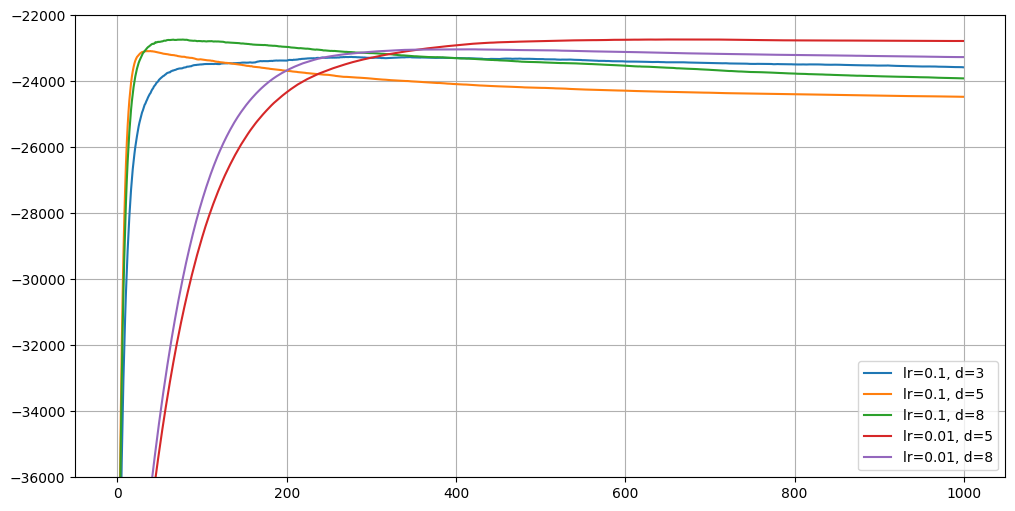

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(cv_gb1_rmse.mean(axis=0), label='lr=0.1, d=3')
plt.plot(cv_gb3_rmse.mean(axis=0), label='lr=0.1, d=5')
plt.plot(cv_gb2_rmse.mean(axis=0), label='lr=0.1, d=8')
plt.plot(cv_gb4_rmse.mean(axis=0), label='lr=0.01, d=5')
plt.plot(cv_gb5_rmse.mean(axis=0), label='lr=0.01, d=8')
plt.ylim((-36000, -22000))
plt.grid()
plt.legend()

print(f"max - {np.max(cv_gb1_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb1_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb2_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb2_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb3_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb3_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb4_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb4_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb5_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb5_rmse.mean(axis=0))}")

In [ ]:
gb_3.fit(X_train, y_train)
y_pred = gb_3.predict(X_test)

print(root_mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

24650.94470160809
0.7409364386497295


## PCA

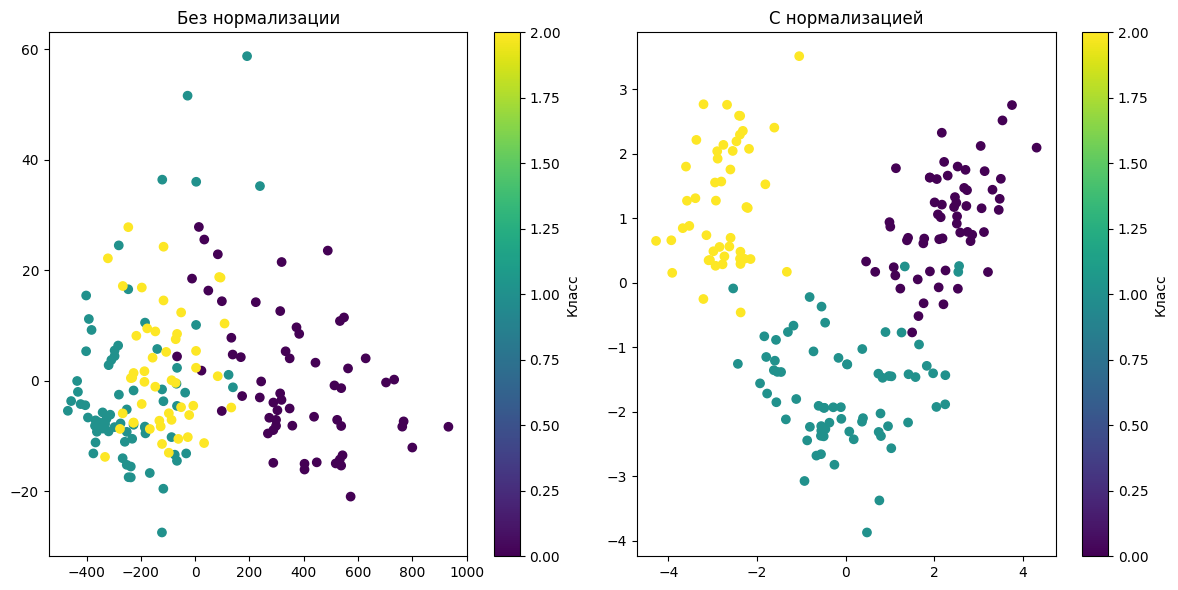

In [46]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features, target = load_wine(return_X_y=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=target, cmap='viridis')
plt.title('Без нормализации')
plt.colorbar(label='Класс')


plt.subplot(1, 2, 2)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
pca = PCA(n_components=2)
principal_components_scaled = pca.fit_transform(features_scaled)
plt.scatter(principal_components_scaled[:, 0], principal_components_scaled[:, 1], c=target, cmap='viridis')
plt.title('С нормализацией')
plt.colorbar(label='Класс')

plt.tight_layout()
plt.show()